In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import fetch_california_housing

In [3]:
ch=fetch_california_housing()

In [4]:
type(ch)

sklearn.utils._bunch.Bunch

In [5]:
ch.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [6]:
print(ch.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [7]:
print(ch.data)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]


# Creating Dataset

In [8]:
dataset=pd.DataFrame(ch.data,columns=ch.feature_names)
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [9]:
dataset['price']=ch.target
dataset.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
dataset.describe() # summerizing stats (only numeric)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [12]:
dataset.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
price         0
dtype: int64

# EDA 
## Co-relate

In [13]:
dataset.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
price,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


In [14]:
# sns.pairplot(dataset)

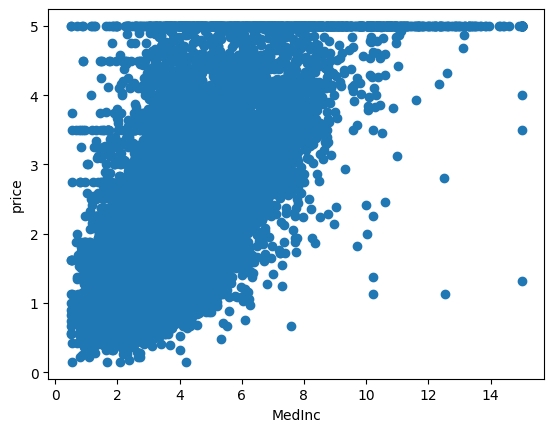

In [15]:
plt.scatter(dataset.MedInc,dataset.price);
plt.xlabel('MedInc')
plt.ylabel('price');

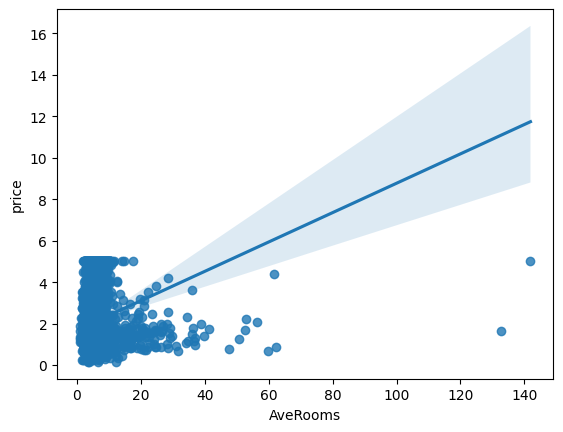

In [16]:
sns.regplot(data=dataset,x='AveRooms',y='price');

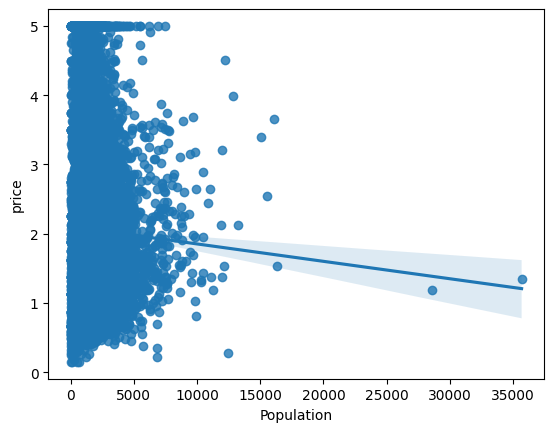

In [17]:
sns.regplot(data=dataset,x='Population',y='price');

## Split

In [18]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [19]:
x.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


## Train_test_split

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [22]:
x_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14883,3.5583,40.0,5.630363,1.062706,796.0,2.627063,32.63,-117.07
13432,3.7011,34.0,4.637931,0.913793,834.0,2.875862,34.10,-117.43
1058,2.0094,19.0,4.351530,1.070786,4030.0,2.417516,39.76,-121.86
4556,0.6775,52.0,1.748287,1.211215,2232.0,1.390654,34.05,-118.25
13362,7.7197,8.0,9.000000,1.285714,25.0,3.571429,34.02,-117.61
...,...,...,...,...,...,...,...,...
9561,4.0694,16.0,5.651408,0.992958,866.0,3.049296,37.36,-120.63
6913,6.1898,35.0,6.345853,1.020344,1758.0,2.751174,33.95,-117.98
6453,3.6639,25.0,5.126482,1.117260,1848.0,2.434783,34.12,-118.06
3414,2.8214,8.0,4.443228,1.158687,2608.0,3.567715,34.27,-118.38


In [23]:
#Scaling
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [24]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [25]:
x_train

array([[-0.16284841,  0.90393407,  0.08253121, ..., -0.0694153 ,
        -1.40612692,  1.2491123 ],
       [-0.08726435,  0.42673879, -0.32973118, ..., -0.02387211,
        -0.71707752,  1.06935629],
       [-0.98268138, -0.7662494 , -0.44870406, ..., -0.10777312,
         1.93599707, -1.14264137],
       ...,
       [-0.10695432, -0.28905413, -0.126784  , ..., -0.10461253,
        -0.70770269,  0.75478326],
       [-0.55288967, -1.64110741, -0.41061183, ...,  0.10277293,
        -0.63739153,  0.59500013],
       [-0.67965705,  1.22206425, -0.35112928, ..., -0.05990582,
         1.27038472, -1.57705174]])

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model=LinearRegression()

In [28]:
model.fit(x_train,y_train)

LinearRegression()

In [29]:
len(model.coef_),len(x.columns)

(8, 8)

In [30]:
model.intercept_

2.06678762666113

In [31]:
#print parameters 
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [32]:
reg_pred=model.predict(x_test)

In [36]:
reg_pred[:100]

array([ 2.05609739,  2.49224032,  2.69171693,  1.79780964,  2.81305096,
        2.15120433,  1.87448938,  0.67891649,  1.50254309,  2.92019459,
        2.62287928,  2.08634302,  2.11145303,  1.44952074,  0.91995405,
        0.33345776,  2.01621925,  1.58253591,  2.13959428,  0.76919042,
        1.81530307,  1.68670826,  1.94197746,  1.5432729 ,  1.68851686,
        0.98265689,  2.19016001,  2.36599101,  2.88123499,  2.252612  ,
        2.34430749,  1.00467344,  1.62085504,  1.46480125,  0.86983509,
        1.40230078,  1.76749603,  3.08572322,  2.23148983,  2.33075142,
        2.0563613 ,  2.41511967,  2.81205434,  2.92663658,  2.18654706,
        1.34964797,  1.85465204,  2.65187694,  1.55454582,  3.25317891,
        6.80659583,  2.70434031,  2.782086  ,  2.23615495,  1.8798731 ,
       -0.73327644,  0.62156502,  3.08284356,  2.59050394,  2.30505398,
        1.21061129,  1.59496084,  1.02450606,  1.64118333,  0.98986645,
        2.35142043,  2.12066955,  0.57784603,  1.41850961,  2.37

# Assumptions

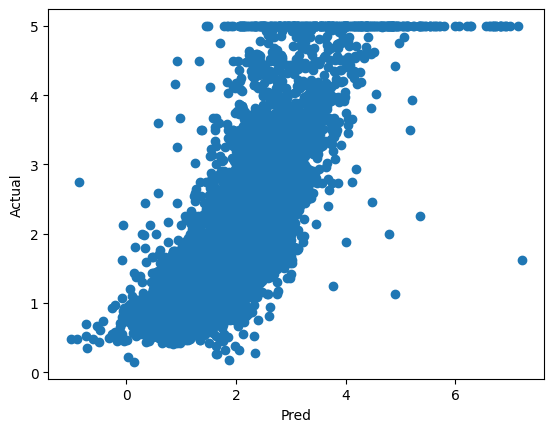

In [39]:
#Scatter
plt.scatter(reg_pred,y_test)
plt.xlabel('Pred')
plt.ylabel('Actual');

In [40]:
# residuals
residuals=y_test-reg_pred

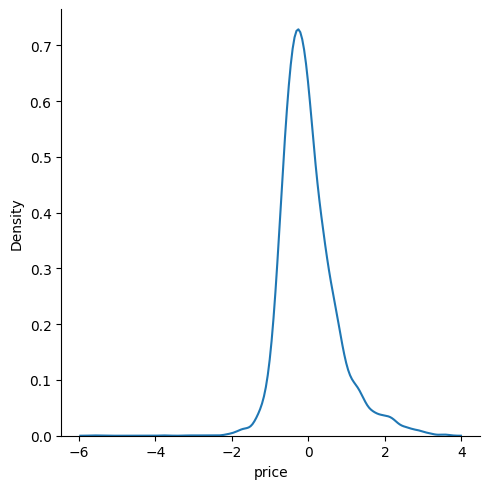

In [42]:
sns.displot(residuals,kind='kde');

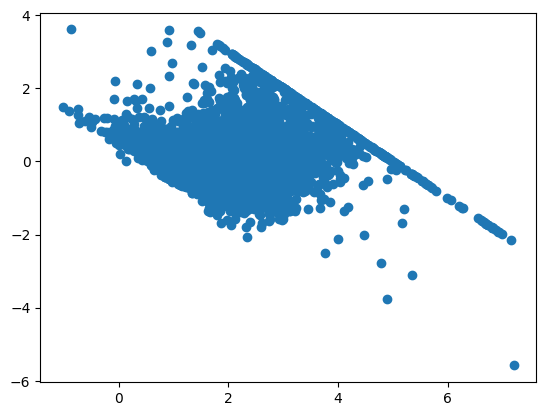

In [43]:
# scatter with pred & residuals
plt.scatter(reg_pred,residuals);

In [45]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print(mean_squared_error(y_test,reg_pred))
print(mean_absolute_error(y_test,reg_pred))
print(np.sqrt(mean_squared_error(y_test,reg_pred)))

0.5208879117152785
0.5314839592422012
0.7217256485086826


## R^2 = 1-SSR/SST 
### SSR-sum of squares of residuals
### SST-total sum of squares

In [51]:
from sklearn.metrics import r2_score
score=r2_score(y_test,reg_pred)
score

0.6109899847245486

## Adjusted R^2 = 1-[(1-r2)*(n-1)/(n-k-1)] , n-nos of obervation,k-nos. of predictor vars

In [52]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6104866562234643

## New Data

In [58]:
ch.data[0].reshape(1,-1)

array([[   8.3252    ,   41.        ,    6.98412698,    1.02380952,
         322.        ,    2.55555556,   37.88      , -122.23      ]])

In [59]:
model.predict(ch.data[0].reshape(1,-1))

array([86.57376664])

# Pickle deployment

In [60]:
import pickle

In [61]:
pickle.dump(model,open('reg_model.pkl','wb'))

In [62]:
pickle_model=pickle.load(open('reg_model.pkl','rb'))

In [63]:
pickle_model.predict(ch.data[0].reshape(1,-1))

array([86.57376664])